# Simulated Experiments (Section 4.2)

First generate the dataset

Then define the new model class

Then generate the plots in the paper

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import colors, ticker, cm

from pprint import pprint
from progressbar import progressbar

%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 10

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm}"

In [4]:
num_queries = 100
cs_size = 10
def get_relevance_labels(xs):
#     return np.clip(np.floor(xs[:, 1]+xs[:,0]), 0.0, 4.0)
    return np.clip(xs[:,2] + xs[:,1], 0.0, 4.0)
    
feats = []
rels = []
for i in range(num_queries):
    groups = np.random.choice(2, size=cs_size, p=[0.8, 0.2])
    #x1s = [np.random.normal(1.0, 0.5) if groups[i]==0 else np.random.normal(2.0, 0.5) for i in range(cs_size)]
    x1s = 3*np.random.random(cs_size)
    x2s = 3*np.random.random(cs_size)
    labels = get_relevance_labels(np.vstack((groups, x1s, x2s)).transpose())
    x2observed = x2s
    x2observed[groups==1] = 0 #3*np.random.random(np.sum(groups==1))
    xs = np.vstack((groups, x1s, x2observed)).transpose()
    feats.append(xs)
    rels.append(labels)

In [5]:
pwd

'/home/ashudeep/projects/fairness/code submission'

In [6]:
from train_yahoo_dataset import on_policy_training
from YahooDataReader import YahooDataReader
import torch
from models import NNModel, LinearModel
from evaluation import evaluate_model

In [7]:
dr = YahooDataReader(None)
dr.data = (feats, rels)
# vdr = YahooDataReader(None)
# vdr.data = (val_feats, val_rels)
vdr = dr

/home/ashudeep/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


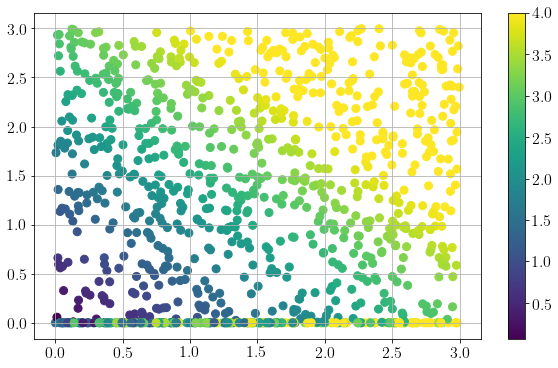

In [8]:
plt.grid()

feats_ = np.reshape(np.asarray(feats), (num_queries*cs_size, 3))
rels_ = np.asarray(rels).flatten()
plt.scatter(feats_[:,1], feats_[:,2], c=rels_)
plt.colorbar()

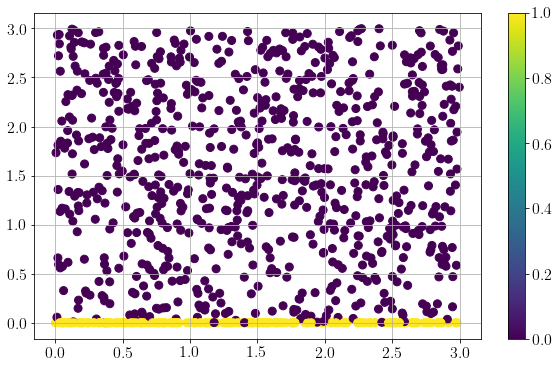

In [9]:
plt.grid()

feats_ = np.reshape(np.asarray(feats), (num_queries*cs_size, 3))
rels_ = np.asarray(rels).flatten()
plt.scatter(feats_[:,1], feats_[:,2], c=feats_[:,0])
plt.colorbar()

In [10]:
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)
args = Namespace(conditional_model=True, gpu_id=None, progressbar=True, evaluate_interval=250, input_dim=3, 
                 eval_rank_limit=1000,
                fairness_version="asym_disparity", entropy_regularizer=0.0, save_checkpoints=False, num_cores=1,
                pooling='concat_avg', dropout=0.0, hidden_layer=8, group_feat_id=0, summary_writing=False, 
                 group_fairness_version="asym_disparity",early_stopping=False, lr_scheduler=False, 
                 validation_deterministic=False, evalk=1000, reward_type="ndcg", baseline_type="value", 
                 use_baseline=True, entreg_decay=0.0, skip_zero_relevance=True, eval_temperature=1.0, optimizer="Adam",
                clamp=False)
torch.set_num_threads(args.num_cores)
args.group_feat_id = 0
args.progressbar = False 

args.lr = 0.1
args.lr_scheduler = True
args.weight_decay = 0.0
args.lr_decay = 0.5

In [11]:
from models import CustomLinearModel

In [12]:
def eval_params(w1, w2, vdr, det=False):
    model = CustomLinearModel(D=3, fix_weight_dim=0)
    model.w.weight.data = torch.tensor([[w1, w2]])
    return evaluate_model(model, vdr, deterministic=det, group_fairness_evaluation=True, args=args, fairness_evaluation=True)

At 0/20 w1s


/home/ashudeep/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


At 1/20 w1s
At 2/20 w1s
At 3/20 w1s
At 4/20 w1s
At 5/20 w1s
At 6/20 w1s
At 7/20 w1s
At 8/20 w1s
At 9/20 w1s
At 10/20 w1s
At 11/20 w1s
At 12/20 w1s
At 13/20 w1s
At 14/20 w1s
At 15/20 w1s
At 16/20 w1s
At 17/20 w1s
At 18/20 w1s
At 19/20 w1s


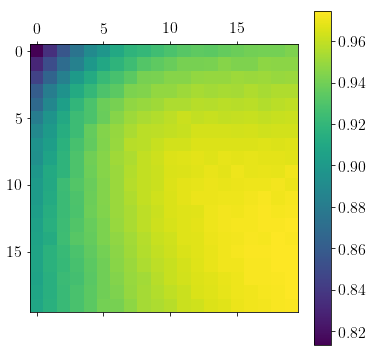

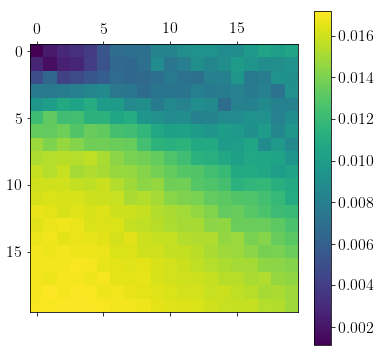

In [14]:
w1s = np.linspace(0, 5, num=20)
w2s = np.linspace(0, 5, num=20)
Z = np.zeros((20,20))
Z2 = np.zeros((20,20))
for i, w1 in enumerate(w1s):
    print("At {}/{} w1s".format(i, len(w1s)))
    for j, w2 in enumerate(w2s):
        res = eval_params(w1, w2, vdr)
        Z[i,j] = res["ndcg"]
        Z2[i,j] = res["avg_group_asym_disparity"]
Z = Z.transpose()
Z2 = Z2.transpose()
plt.matshow(Z)
plt.colorbar()
plt.show()
plt.matshow(Z2)
plt.colorbar()

In [15]:
Z2.max(), Z2.min()

(0.017221534968854733, 0.0011103244573027016)

In [16]:
model_params_list = []
disparities = []
lambdas_list = [0, 1, 2, 3,5,7,8, 10, 15, 20, 25]
for lgroup in lambdas_list:
    torch.set_num_threads(args.num_cores)
    args.epochs = 5
    args.progressbar = False
    args.weight_decay = 0.0
    args.sample_size = 10
    args.pooling = False
    args.skip_zero_relevance = True
    args.validation_deterministic = False
    args.lambda_reward = 1.0
    args.lambda_ind_fairness = 0.0
    args.lambda_group_fairness = lgroup


    model = CustomLinearModel(D=args.input_dim, use_bias=False, fix_weight_dim=0)
    
    model = on_policy_training(dr, vdr, model, args=args)
    results = evaluate_model(model, vdr, fairness_evaluation=False, group_fairness_evaluation=True, 
                             deterministic=False, args=args, num_sample_per_query=20)
    print(results)
    model_params_list.append(model.w.weight.data.tolist()[0])
    print("Learnt model for lambda={} has model weights as {}".format(lgroup, model_params_list[-1]))
    disparities.append(results["avg_group_asym_disparity"])

Starting training with the following config
Learning rate 0.1, Weight decay 0.0, Sample size 10
Lambda_reward: 1.0, lambda_ind_fairness:0.0, lambda_group_fairness:0
Training....
Evaluating on validation set: iteration 0/100 of epoch 0
Epoch 0, Average Validation: NDCG: 0.8349830024537499, DCG 36.76807966208421, Average Rank 4.5, ERR 0.725318833502375
Training....
LR is set to 0.05
Evaluating on validation set: iteration 0/100 of epoch 1
Epoch 1, Average Validation: NDCG: 0.9709871852935366, DCG 42.609361555424606, Average Rank 4.5, ERR 0.9378293456698517
Training....
LR is set to 0.025
Evaluating on validation set: iteration 0/100 of epoch 2
Epoch 2, Average Validation: NDCG: 0.9725296941794832, DCG 42.67958508568533, Average Rank 4.5, ERR 0.9378617561399345
Training....
LR is set to 0.0125
Evaluating on validation set: iteration 0/100 of epoch 3
Epoch 3, Average Validation: NDCG: 0.9722205560377616, DCG 42.671129720376626, Average Rank 4.5, ERR 0.9366705841716118
Training....
LR is se

/home/ashudeep/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'ndcg': 0.9739011781702108, 'dcg': 42.73381188930625, 'avg_rank': 4.5, 'err': 0.9399152866663302, 'avg_group_disparity': 0.0032959549045807716, 'avg_group_asym_disparity': 0.013146559250006231}
Learnt model for lambda=0 has model weights as [4.667324066162109, 3.4590835571289062]
Starting training with the following config
Learning rate 0.1, Weight decay 0.0, Sample size 10
Lambda_reward: 1.0, lambda_ind_fairness:0.0, lambda_group_fairness:1
Training....
Evaluating on validation set: iteration 0/100 of epoch 0
Epoch 0, Average Validation: NDCG: 0.8052156395876487, DCG 35.49765839511715, Average Rank 4.5, ERR 0.6718529981890714
Average Validation Group Exposure disparity: 0.005494967650242544, Group Asymmetric disparity: 0.001234554502463148
Training....
LR is set to 0.05
Evaluating on validation set: iteration 0/100 of epoch 1
Epoch 1, Average Validation: NDCG: 0.9675167908508212, DCG 42.46860443494799, Average Rank 4.5, ERR 0.9292704982535868
Average Validation Group Exposure dispari

Training....
LR is set to 0.0125
Evaluating on validation set: iteration 0/100 of epoch 3
Epoch 3, Average Validation: NDCG: 0.9523244212890399, DCG 41.82727251936562, Average Rank 4.5, ERR 0.904901926730146
Average Validation Group Exposure disparity: 0.0020985018204046787, Group Asymmetric disparity: 0.008000636827641598
Training....
LR is set to 0.00625
Evaluating on validation set: iteration 0/100 of epoch 4
Epoch 4, Average Validation: NDCG: 0.954419899157386, DCG 41.91621788484335, Average Rank 4.5, ERR 0.9086941263920363
Average Validation Group Exposure disparity: 0.002132380649362546, Group Asymmetric disparity: 0.008718689189568246
Epoch 4, Average Validation: NDCG: 0.9543632562815226, DCG 41.92014757333477, Average Rank 4.5, ERR 0.9065332990314117
Average Validation Group Exposure disparity: 0.0023290827658056625, Group Asymmetric disparity: 0.008740194283688482
{'ndcg': 0.9552544678225345, 'dcg': 41.94692124378379, 'avg_rank': 4.5, 'err': 0.9085813519368293, 'avg_group_disp

Epoch 0, Average Validation: NDCG: 0.8604615698945909, DCG 37.90076276848339, Average Rank 4.5, ERR 0.7597904295555438
Average Validation Group Exposure disparity: 0.0026196381757913434, Group Asymmetric disparity: 0.0040429426024152885
Training....
LR is set to 0.05
Evaluating on validation set: iteration 0/100 of epoch 1
Epoch 1, Average Validation: NDCG: 0.9382901566751767, DCG 41.23865598966772, Average Rank 4.5, ERR 0.8781974447655995
Average Validation Group Exposure disparity: 0.002088269842662455, Group Asymmetric disparity: 0.006609909072408552
Training....
LR is set to 0.025
Evaluating on validation set: iteration 0/100 of epoch 2
Epoch 2, Average Validation: NDCG: 0.9260362446215793, DCG 40.70889977171857, Average Rank 4.5, ERR 0.8619441067609995
Average Validation Group Exposure disparity: 0.0021938133755554025, Group Asymmetric disparity: 0.005121619098194974
Training....
LR is set to 0.0125
Evaluating on validation set: iteration 0/100 of epoch 3
Epoch 3, Average Validati

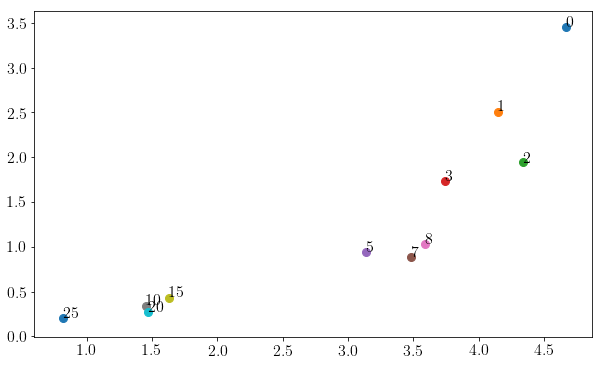

In [17]:
#scatter plot
for i, model_weights in enumerate(model_params_list):
    plt.scatter(model_weights[0], model_weights[1], label=lambdas_list[i])
    plt.annotate('{}'.format(lambdas_list[i]), (model_weights[0], model_weights[1]))

In [18]:
model_params_list_updated = np.array(model_params_list)[np.array([0,1,3,4,6,7])]
lambdas_list_updated = np.array(lambdas_list)[np.array([0,1,3,4,6,7])]
pprint(list(zip(lambdas_list_updated, model_params_list_updated)))

[(0, array([4.66732407, 3.45908356])),
 (1, array([4.14655161, 2.50042915])),
 (3, array([3.74119282, 1.73113203])),
 (5, array([3.13516521, 0.93961078])),
 (8, array([3.58932614, 1.02695215])),
 (10, array([1.45431459, 0.33620131]))]


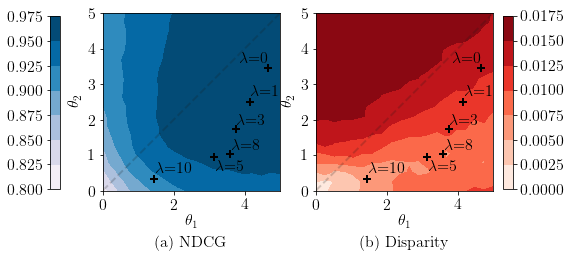

In [19]:
fig= plt.figure(figsize=(7, 4))
ax1 = fig.add_subplot(121)
im = ax1.contourf(w2s, w1s, Z, cmap=cm.PuBu)
ax1.xaxis.set_label_position('bottom')
ax1.yaxis.set_label_position('left')
ax1.tick_params(labelbottom=True, labeltop=False, labelleft=True , labelright=False )
ax1.set_xlabel(r'$\theta_1$', fontsize=16)
ax1.set_ylabel(r'$\theta_2$', fontsize=16)
ax1.set_title('(a) NDCG', y=-0.35)
cbaxes = fig.add_axes([0.02, 0.20, 0.02, 0.6])
fig.colorbar(im, ax=ax1, cax=cbaxes)
cbaxes.yaxis.set_label_position('left')
cbaxes.yaxis.set_ticks_position('left')
ax1.axis('equal')

ax2 = fig.add_subplot(122)
from matplotlib import colors
im = ax2.contourf(w2s, w1s, Z2, cmap=cm.Reds)
ax2.xaxis.set_label_position('bottom')
ax2.yaxis.set_label_position('left')
ax2.tick_params(labelbottom=True, labeltop=False, labelleft=True , labelright=False )
ax2.set_xlabel(r'$\theta_1$', fontsize=16)
ax2.set_ylabel(r'$\theta_2$', fontsize=16)
ax2.set_title('(b) Disparity', y=-0.35)
cbaxes = fig.add_axes([0.92, 0.20, 0.02, 0.6])

ax2.axis('equal')

fig.colorbar(im, ax=ax2, cax=cbaxes)
cbaxes.yaxis.set_label_position('right')
cbaxes.yaxis.set_ticks_position('right')

ax1.scatter(model_params_list_updated[:,0], model_params_list_updated[:,1], marker='+', color='k')
ax2.scatter(model_params_list_updated[:,0], model_params_list_updated[:,1], marker='+', color='k')
texts = []
texts2 = []

ax1.plot([0, 5], [0, 5], ls="--", c=".1", alpha=0.2)
ax2.plot([0, 5], [0, 5], ls="--", c=".1", alpha=0.2)
    
for i in range(len(lambdas_list_updated)):
    texts.append(ax1.text(model_params_list_updated[i,0], model_params_list_updated[i,1], 
                          r"$\lambda$="+str(lambdas_list_updated[i]), fontsize=16))
    texts2.append(ax2.text(model_params_list_updated[i,0], model_params_list_updated[i,1], 
                           r"$\lambda$="+str(lambdas_list_updated[i]), fontsize=16))
from adjustText import adjust_text
adjust_text(texts, ax=ax1)#, x=w1s, y=w2s)
adjust_text(texts2, ax=ax2)#,  x=w1s, y=w2s)
ax1.set_aspect('equal', adjustable='box')
ax2.set_aspect('equal', adjustable='box')
ax1.set_xlim(0.0, 5.0)
ax2.set_xlim(0.0, 5.0)
ax1.set_ylim(0.0, 5.0)
ax2.set_ylim(0.0, 5.0)
ax1.set_aspect('equal', adjustable='box')
ax2.set_aspect('equal', adjustable='box')
    
#fig.tight_layout()
plt.savefig("plots/group_fairness_synthetic_contourf.pdf", bbox_inches='tight')
plt.show()

In [20]:
from itertools import permutations 
from scipy.optimize import linprog

In [21]:


def assign_groups(groups):
    G = [[], []]
    for i in range(len(groups)):
        G[groups[i]].append(i)
    return G


def fair_rank(relevances, groups ,lmda = 1):
    n = len(relevances)
    pos_bias = vvector(n)
    G = assign_groups(groups)
    n_g, n_i = 0, 0
    n_g += (len(G)-1)*len(G)
    n_c = n**2 + n_g 
    
    
    c = np.ones(n_c)
    c[:n**2] *= -1
    c[n**2:] *= lmda
    A_eq = []
    #For each Row
    for i in range(n):
        A_temp = np.zeros(n_c)
        A_temp[i*n:(i+1)*n] = 1
        assert(sum(A_temp)==n)
        A_eq.append(A_temp)
        c[i*n:(i+1)*n] *= relevances[i]

    #For each coloumn
    for i in range(n):
        A_temp = np.zeros(n_c)
        A_temp[i:n**2:n] = 1
        assert(sum(A_temp)==n)
        A_eq.append(A_temp)
        #Optimization 
        c[i:n**2:n] *= pos_bias[i] 
    b_eq = np.ones(n*2) 
    A_eq = np.asarray(A_eq)
    bounds = [(0,1) for _ in range(n**2)] + [(0,None) for _ in range(n_g+n_i)]
    
    
    A_ub = []
    b_ub = np.zeros(n_g)
    sum_rels = []
    for group in G:
        #Avoid devision by zero
        sum_rel = np.max([np.sum(np.asarray(relevances)[group]), 0.01])
        sum_rels.append(sum_rel)
    comparisons = list(permutations(np.arange(len(G)),2))
    j = 0
    for a,b in comparisons:
        f = np.zeros(n_c)
        if len(G[a]) > 0 and len(G[b])>0 and sum_rels[a]/len(G[a]) >= sum_rels[b]/len(G[b]):
            for i in range(n):
                tmp1 = len(G[a]) / sum_rels[a] if i in G[a] else 0 
                tmp2 = len(G[b]) / sum_rels[b] if i in G[b] else 0 
                #f[i*n:(i+1)*n] *= max(0, sign*(tmp1 - tmp2))
                f[i*n:(i+1)*n] =  (tmp1 - tmp2)
            for i in range(n):
                f[i:n**2:n] *= pos_bias[i]
            f[n**2+j] = -1
        j += 1
        A_ub.append(f)

    res = linprog(c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub, bounds=bounds, 
                                  method = "interior-point")#, options=dict(tol=1e-12),)
    if res.success is False:
        print("Constraint not satisfied!!")
    probabilistic_ranking = np.reshape(res.x[:n**2],(n,n))
    return probabilistic_ranking, res, res.fun

In [22]:
def get_best_rankmatrix(true_rel_vector):
    N = len(true_rel_vector)
    bestranking = np.zeros((N,N))
    bestr = np.argsort(true_rel_vector)[::-1]
    for i in range(N):
        bestranking[bestr[i], i] = 1
    return bestranking

#returns DCG value
def get_DCG(ranking, relevances, vvector):
    N = len(relevances)
    return np.matmul(np.matmul(2**relevances-1, ranking), vvector.transpose())

def get_ndcg(ranking, relevances, vvector):
    bestr = get_best_rankmatrix(relevances)
    return get_DCG(ranking, relevances, vvector)/get_DCG(bestr, relevances, vvector)


def get_fairness_loss(ranking, relevances, vvector, groups):
    avg_rels = [np.mean(relevances[groups==i]) for i in range(2)]
    sign = +1 if avg_rels[0] > avg_rels[1] else -1
    exposures = np.matmul(ranking, vvector)
    group_avg_exposures = [np.mean(exposures[groups==0]), np.mean(exposures[groups==1])]
    #print(avg_rels, sign, exposures, group_avg_exposures)
    loss = max([0.0, sign*(group_avg_exposures[0]/avg_rels[0] - group_avg_exposures[1]/avg_rels[1])])
    return loss

def get_avg_fairness_loss(dr, predicted_rels, vvector, lmbda):
    feats, rel = dr.data
    test_losses = []
    for i in range(len(rel)):
        N = len(rel[i])
        pred_rels = predicted_rels[i]
        groups = np.array(feats[i][:,0], dtype=np.int)
        P, _, _ = fair_rank(pred_rels, groups, lmbda )
        test_loss = get_fairness_loss(P, rel[i], vvector[:N], groups)
        test_losses.append(test_loss)
    return np.mean(test_losses)

vvector = lambda N: 1. / np.log2(2 + np.arange(N))

In [23]:
# Linear regression
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept=False, normalize=False)
feats, rel = dr.data
feats = np.array([item for sublist in feats for item in sublist])
rel = np.array([item for sublist in rel for item in sublist])
model.fit(feats[:, 1:], rel)
# predictions on validation
feats, rel = vdr.data
se_sum = 0
length = 0
predicted_rels = []
for i, query in enumerate(feats):
    rel_pred = model.predict(query[:,1:])
    predicted_rels.append(rel_pred)
    se_sum += np.sum((rel_pred - rel[i])**2)
    length += len(rel[i])
print(se_sum/ length)

0.5886257689256316


In [24]:
print(model.coef_)
w1, w2 = model.coef_
print(eval_params(w1, w2, vdr, True))
print(get_avg_fairness_loss(vdr, predicted_rels, vvector(200), 0.0))

[1.17337554 0.74277473]


/home/ashudeep/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'ndcg': 0.977840980420459, 'dcg': 42.900863739182206, 'avg_rank': 4.5, 'err': 0.9429022991188838, 'avg_residuals': 0.26503047018659354, 'avg_rsq': 0.430067683796259, 'avg_l1_dists': 1.1325267078667856, 'scale_inv_mse': 0.3604033049091358, 'asymmetric_disparity': 0.020699698629422243, 'avg_group_disparity': 0.0032322572873320888, 'avg_group_asym_disparity': 0.012246971537831601}


/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_util.py:763: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  warn(redundancy_warning, OptimizeWarning)


0.012246971473447136


/home/ashudeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
/home/ashudeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.81849e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_util.py:763: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  warn(redundancy_warning, OptimizeWarning)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
/home/ashudeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68

Lambda: 0.0, Average Test Fairness Loss: 0.012246971473447136, Average Test NDCG: 0.9778409809329829
Lambda: 0.3157894736842105, Average Test Fairness Loss: 0.010375222144423008, Average Test NDCG: 0.9807641483169592


/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.98459e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.72691e-17): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.10369e-17): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.28576e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-c

Lambda: 0.631578947368421, Average Test Fairness Loss: 0.007896172538357261, Average Test NDCG: 0.9842752309983763
Lambda: 0.9473684210526315, Average Test Fairness Loss: 0.006157812859793032, Average Test NDCG: 0.9852132323612237
Lambda: 1.263157894736842, Average Test Fairness Loss: 0.008306823949479309, Average Test NDCG: 0.9843586159602604
Lambda: 1.5789473684210527, Average Test Fairness Loss: 0.00887089838178266, Average Test NDCG: 0.9809772230925903


/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.38699e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


Lambda: 1.894736842105263, Average Test Fairness Loss: 0.012367354035816076, Average Test NDCG: 0.9767247884810532


/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.4e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.3327e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.84572e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


Lambda: 2.2105263157894735, Average Test Fairness Loss: 0.015465297470245885, Average Test NDCG: 0.9724294663877151


/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.66445e-24): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.52275e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.7841e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.3697e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


Lambda: 2.526315789473684, Average Test Fairness Loss: 0.017747949380909466, Average Test NDCG: 0.9647098288054294


/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.12655e-25): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.1997e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.04375e-17): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


Lambda: 2.8421052631578947, Average Test Fairness Loss: 0.022305729182348986, Average Test NDCG: 0.961274165930924


/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.72035e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


Lambda: 3.1578947368421053, Average Test Fairness Loss: 0.027810015313154572, Average Test NDCG: 0.9579999619660609


/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.28878e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.85287e-17): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


Lambda: 3.4736842105263155, Average Test Fairness Loss: 0.03186797099342532, Average Test NDCG: 0.9532967112093392


/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.10883e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.42261e-17): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.79977e-26): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.71198e-25): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-c

Lambda: 3.789473684210526, Average Test Fairness Loss: 0.03338475797853366, Average Test NDCG: 0.9480460614990048


/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.29847e-24): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.40661e-23): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


Lambda: 4.105263157894736, Average Test Fairness Loss: 0.03524052607641487, Average Test NDCG: 0.9470960464686984


/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.79409e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


Lambda: 4.421052631578947, Average Test Fairness Loss: 0.03540772251797687, Average Test NDCG: 0.9465911636693405
Lambda: 4.7368421052631575, Average Test Fairness Loss: 0.03560121230757608, Average Test NDCG: 0.9460297967024002


/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.73394e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.21571e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.62059e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.40048e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


Lambda: 5.052631578947368, Average Test Fairness Loss: 0.035822845917102636, Average Test NDCG: 0.9458508926651004


/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.30968e-24): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.94477e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.66016e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


Lambda: 5.368421052631579, Average Test Fairness Loss: 0.035822845901577895, Average Test NDCG: 0.9456141888995317


/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.66088e-25): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.78466e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.03586e-24): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.56707e-24): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-c

Lambda: 5.684210526315789, Average Test Fairness Loss: 0.03610770241798621, Average Test NDCG: 0.9452382551246572


/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.02273e-23): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.42162e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.22992e-17): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.35357e-24): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


Lambda: 6.0, Average Test Fairness Loss: 0.03610770241750038, Average Test NDCG: 0.9447911974726084


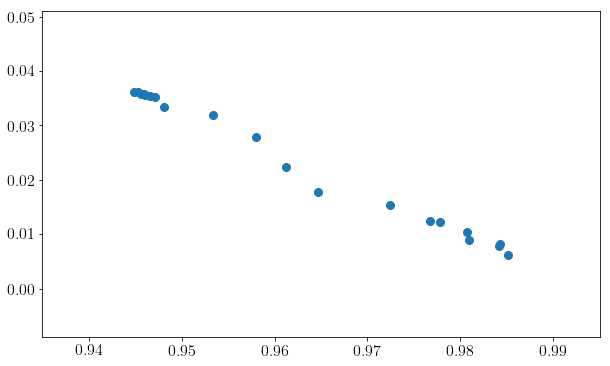

In [25]:
# # for each lambda
# now for each query, estimate all relevances
# we find a fair ranking, find it's loss w.r.t true relevances
lmbdas = np.linspace(0, 6, 20)

plt_data = np.zeros((len(lmbdas), 2))

for j, lmbda in enumerate(lmbdas):
    test_losses = []
    test_ndcgs = []
    
    for i in range(len(predicted_rels)):
        true_rels = rel[i]
        pred_rels = predicted_rels[i]
        groups = np.array(feats[i][:, 0], dtype=np.int)
        n = len(groups)
        
        P, _, _ = fair_rank(pred_rels, groups, lmbda)
        
        test_loss = get_fairness_loss(P, true_rels, vvector(n), groups)
        test_losses.append(test_loss)
        
        test_ndcg = get_ndcg(P, true_rels, vvector(n))
        test_ndcgs.append(test_ndcg)
        
    plt_data[j] = [np.mean(test_ndcgs), np.mean(test_losses)]
        
        
    print("Lambda: {}, Average Test Fairness Loss: {}, Average Test NDCG: {}".format(lmbda, 
                                                     np.mean(test_losses), np.mean(test_ndcgs)))

plt.scatter(plt_data[:, 0], plt_data[:, 1])

In [26]:
model_params_list

[[4.667324066162109, 3.4590835571289062],
 [4.146551609039307, 2.500429153442383],
 [4.340959072113037, 1.941473126411438],
 [3.7411928176879883, 1.7311320304870605],
 [3.135165214538574, 0.9396107792854309],
 [3.4795894622802734, 0.88735032081604],
 [3.5893261432647705, 1.0269521474838257],
 [1.4543145895004272, 0.3362013101577759],
 [1.6274868249893188, 0.42923831939697266],
 [1.467610478401184, 0.2756645679473877],
 [0.8158630728721619, 0.20417392253875732]]

In [27]:
plt_data_2 = []
plt_data_3 = []
for i, (w1, w2) in enumerate(model_params_list):
    if i == 0:
        result = eval_params(w1, w2, vdr, det=True)
        plt_data_2.append([result["ndcg"], result["avg_group_asym_disparity"]])
    result = eval_params(w1, w2, vdr, det=False)
    plt_data_2.append([result["ndcg"], result["avg_group_asym_disparity"]])
    result = eval_params(w1, w2, vdr, det=True)
    plt_data_3.append([result["ndcg"], result["avg_group_asym_disparity"]])

/home/ashudeep/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [28]:
plt_data_2 = np.array(plt_data_2)

In [29]:
plt_data_2 = np.array(plt_data_2)
plt_data_3 = np.array(plt_data_3)

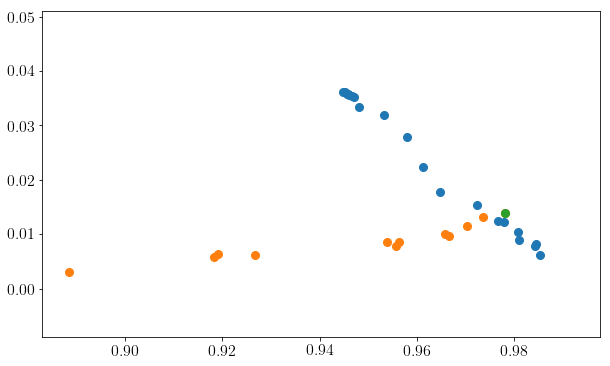

In [30]:
plt.scatter(plt_data[:, 0], plt_data[:, 1])
plt.scatter(plt_data_2[:, 0], plt_data_2[:, 1])
plt.scatter(plt_data_3[0, 0], plt_data_3[0, 1])

In [31]:
CustomLinearModel(D=3, fix_weight_dim=0)

CustomLinearModel(
  (w): Linear(in_features=2, out_features=1, bias=False)
)

In [32]:
from zehlike import *
model = CustomLinearModel(D=3, fix_weight_dim=0)
args.lr = [0.001]
args.lambda_reward = 1.0
plt_data_4 = []
lambdas = [0.0, 0.1, 1.0, 10, 100, 1000, 10000, 100000, 1000000]
args.weight_decay = [0.0]
args.epochs = [10]
args.evaluate_interval = 100
disparities_mat = np.zeros((len(lambdas), 1))
ndcg_mat = np.zeros((len(lambdas), 1))
for i, lg in enumerate(lambdas):
    args.lambda_group_fairness = lg
    model = demographic_parity_train(model, dr, vdr, vvector(200), args)
    results = evaluate_model(
            model,
            vdr,
            fairness_evaluation=False,
            group_fairness_evaluation=True,
            deterministic=True,
            args=args,
            num_sample_per_query=100)
    plt_data_4.append([results["ndcg"], results["avg_group_asym_disparity"]])
    ndcg_mat[i, 0], disparities_mat[i,0] = results["ndcg"], results["avg_group_asym_disparity"]

/home/ashudeep/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ashudeep/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [33]:
print(plt_data_4)

[[0.9388271763382195, 0.017685739353128175], [0.9774553499212602, 0.012182069046745972], [0.9775911213566996, 0.012182069046745972], [0.9774978282491219, 0.012182069046745968], [0.9776865253445688, 0.012182069046745972], [0.9784495790423681, 0.013492614443576644], [0.9781285199058054, 0.014318160492669218], [0.9762888585364919, 0.015477372552100601], [0.975539929770557, 0.01583026493341217]]


In [34]:
plt_data_4 = np.array(plt_data_4)

In [35]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 10

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams[
    'text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm}"

In [36]:
def ndcg_vs_disparity_plot(plt_data_mats, names, join=False, ranges=None):
    plt.figure(figsize=(5.5,3.65))
    if ranges:
        plt.xlim(ranges[0])
        plt.ylim(ranges[1])
    for i, plt_data_mat in enumerate(plt_data_mats):
        if not join:
            plt.scatter(
                plt_data_mats[i][:, 0],
                plt_data_mats[i][:, 1],
                marker="+",
                label=names[i])
        else:
            plt.plot(
                plt_data_mats[i][:, 0],
                plt_data_mats[i][:, 1],
                marker="+",
                linestyle='--',
                label=names[i], alpha=0.75)
    plt.legend(fontsize=12)
    plt.title("(c) Utility-Fairness trade-off",y=-0.30)
    plt.xlabel("NDCG", fontsize=16)
    plt.ylabel(r'$\hat{\mathcal{D}}_{\rm group}$', fontsize=16)
    plt.grid()
    plt.savefig('./plots/toy_tradeoff.pdf', bbox_inches='tight')
    plt.show()

/home/ashudeep/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


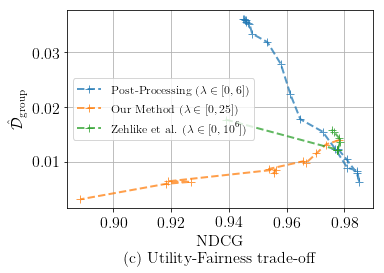

In [37]:
ndcg_vs_disparity_plot([plt_data, plt_data_2,plt_data_4],
                      ["Post-Processing ($\lambda \in [0, 6]$)",
                      "Our Method ($\lambda \in [0,25]$)", 
                      "Zehlike et al. ($\lambda \in [0, 10^6]$)"],
                      join=True)